### Loss Function
$J(w) = \frac{1}{2N}\sum_{i=1}^{N}(w^Tx_i-y_i)^2$

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_data(dataset):
    data = load_svmlight_file("{}".format(dataset))
    # data = load_svmlight_file("../dataset/australian_scale")
    input_data = data[0].toarray()
    return input_data, data[1]

In [3]:
def get_dataset(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    return x_train, x_test, y_train, y_test

In [4]:
def initial_w(dimension):
    w = np.zeros((dimension, 1))
    # w = np.random.random((dimension, 1))
    # w = np.random.normal(size=(dimension, 1))
    return w

In [5]:
def plot_loss(training_loss, testing_loss):
    x = np.array(range(1, len(training_loss)+1))
    plt.figure()
    plt.plot(x, np.array(training_loss), label="train")
    plt.plot(x, np.array(testing_loss), label="test")
    plt.xlabel("Epoch")
    plt.ylabel("loss of L2 norm")
    plt.title("Experiment")
    plt.legend()
    plt.show()

In [6]:
def main(dataset, lr, nEpochs):
    # get dataset
    input_data, label = get_data(dataset)
    x_train, x_test, y_train, y_test = get_dataset(input_data, label)

    # initialize the w
    w = initial_w(dimension=(13+1))

    # handle b
    train_column = np.ones((len(x_train), 1))
    x_train = np.column_stack((x_train, train_column))
    test_column = np.ones((len(x_test), 1))
    x_test = np.column_stack((x_test, test_column))

    # plot
    training_loss_list = []
    testing_loss_list = []

    for i in range(nEpochs):
        # calculate the gradient
        grad = (np.dot(np.transpose(x_train), (np.dot(x_train, w) - y_train.reshape(-1, 1))))/len(x_train)
        # update
        w = w - lr * grad
        # training error and testing error
        training_loss = (1.0/2)*(np.mean((np.square(np.dot(x_train, w) - y_train.reshape(-1, 1)))))
        testing_loss = (1.0/2)*(np.mean((np.square(np.dot(x_test, w) - y_test.reshape(-1, 1)))))
        training_loss_list.append(training_loss)
        testing_loss_list.append(testing_loss)
        print("training error:[{}] testing error:[{}]".format(training_loss, testing_loss))

    # plot
    plot_loss(training_loss_list, testing_loss_list)

training error:[111.4480795538343] testing error:[86.52188972500352]
training error:[57.850373174119014] testing error:[41.80954672375072]
training error:[42.368664542680236] testing error:[30.971269433224176]
training error:[37.23553930969113] testing error:[28.367417448136376]
training error:[34.98437336015206] testing error:[27.57869438343125]
training error:[33.59172921765532] testing error:[27.102400554015443]
training error:[32.49795124896612] testing error:[26.639609831403206]
training error:[31.54009240640099] testing error:[26.158723293258806]
training error:[30.66489701815801] testing error:[25.67313976713437]
training error:[29.85097459744696] testing error:[25.195663687206608]
training error:[29.08725494619343] testing error:[24.733082348790482]
training error:[28.366713933159666] testing error:[24.287973964918642]
training error:[27.684333406061693] testing error:[23.860725814936448]
training error:[27.036298650856093] testing error:[23.45077232981669]
training error:[26.4

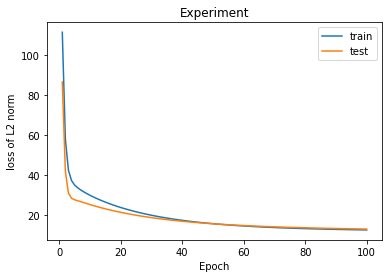

In [7]:
if __name__ == '__main__':
    main(dataset= 'housing_scale', lr=0.1, nEpochs=100)